In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop    # Tối ưu
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical  # Sử dụng để làm nổi đối tượng cần phân loại
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import pandas as pd
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import pickle
import math as m

In [ ]:
load_train_data='/content/drive/MyDrive/AI/Tien/'

In [ ]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255,validation_split=0.2,rotation_range=10, 
                             zoom_range = 0.1,  
                             width_shift_range=0.1, 
                             height_shift_range=0.1,
                             brightness_range=(0.9, 1.1))

In [ ]:
train_data=train.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
    subset = 'training',
    shuffle = True
   )
validation_set=validation.flow_from_directory(
    load_train_data,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
    subset = 'validation',
    shuffle = True
    )

Found 218 images belonging to 11 classes.
Found 42 images belonging to 11 classes.


In [ ]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'100k': 0, '10k': 1, '1k': 2, '200k': 3, '200đ': 4, '20k': 5, '2k': 6, '500k': 7, '500đ': 8, '50k': 9, '5k': 10}
{'100k': 0, '10k': 1, '1k': 2, '200k': 3, '200đ': 4, '20k': 5, '2k': 6, '500k': 7, '500đ': 8, '50k': 9, '5k': 10}


In [ ]:
drive.mount('/content/drive',force_remount=True)
k100_dir='/content/drive/MyDrive/AI/Tien/100k/'
k10_dir='/content/drive/MyDrive/AI/Tien/10k/'
k1_dir='/content/drive/MyDrive/AI/Tien/1k/'
k200_dir='/content/drive/MyDrive/AI/Tien/200k/'
d200_dir='/content/drive/MyDrive/AI/Tien/200đ/'
k20_dir='/content/drive/MyDrive/AI/Tien/20k/'
k2_dir='/content/drive/MyDrive/AI/Tien/2k/'
k500_dir='/content/drive/MyDrive/AI/Tien/500k/'
d500_dir='/content/drive/MyDrive/AI/Tien/500đ/'
k50_dir='/content/drive/MyDrive/AI/Tien/50k/'
k5_dir='/content/drive/MyDrive/AI/Tien/5k/'

k100_files = os.listdir(k100_dir)
print(k100_files[:20])

k10_files = os.listdir(k10_dir)
print(k10_files[:20])

k1_files = os.listdir(k1_dir)
print(k1_files[:20])

k200_files = os.listdir(k200_dir)
print(k200_files[:20])

d200_files = os.listdir(d200_dir)
print(d200_files[:20])

k20_files = os.listdir(k20_dir)
print(k20_files[:20])

k2_files = os.listdir(k2_dir)
print(k2_files[:20])

k500_files = os.listdir(k500_dir)
print(k500_files[:20])

d500_files = os.listdir(d500_dir)
print(d500_files[:20])

k50_files = os.listdir(k50_dir)
print(k50_files[:20])

k5_files = os.listdir(k5_dir)
print(k5_files[:20])

Mounted at /content/drive
['100nghins.jpg', 'images (10).jpg', 'images (9).jpg', 'images.jpg', 'images (1).jpg', 'images (2) (1).jpg', 'images (2).jpg', 'images (3) (1).jpg', 'images (3).jpg', 'images (4) (1).jpg', 'images (4).jpg', 'images (5) (1).jpg', 'images (5).jpg', 'download.jpg', 'images (6) (1).jpg', 'images (6).jpg', 'images (7) (1).jpg', 'images (7).jpg', 'images (8) (1).jpg', 'images (8).jpg']
['download.jpg', 'images (11).jpg', 'images.jpg', 'images (1).jpg', 'images (2).jpg', 'nam-mo-thay-tien-10-nghin.jpg', 'images (3) (1).jpg', 'images (3).jpg', 'images (4) (1).jpg', 'images (4).jpg', 'images (5) (1).jpg', 'images (5).jpg', 'images (6) (1).jpg', 'images (6).jpg', 'images (7) (1).jpg', 'images (7).jpg', 'ad576bf562a84ee156fd691bcff09f1a.jpg', 'images (8).jpg', 'images (9).jpg', 'images (10).jpg']
['Đồng_bạc_1000_đồng.jpg', 'images.jpg', 'images (1) (1).jpg', 'images (1).jpg', 'images (2).jpg', 'images (3) (1).jpg', 'images (3).jpg', 'images (4).jpg', 'images (5) (1)

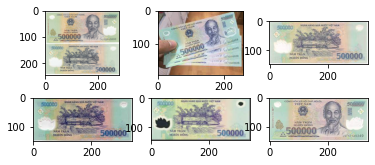

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/AI/Tien/500k/'
for i in range(6):
  plt.subplot(330+i+1)
  filename = folder + '500k' + str(i) + '.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150,150,3)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])
history=model.fit(train_data,batch_size=10,epochs=30,verbose=1,validation_data=validation_set)

Epoch 1/30
55/55 [==============================] - 95s 2s/step - loss: 6.1621 - accuracy: 0.1147 - val_loss: 2.3801 - val_accuracy: 0.1667
Epoch 2/30
55/55 [==============================] - 89s 2s/step - loss: 2.3772 - accuracy: 0.1972 - val_loss: 2.3638 - val_accuracy: 0.1429
Epoch 3/30
55/55 [==============================] - 86s 2s/step - loss: 2.3870 - accuracy: 0.2202 - val_loss: 2.3677 - val_accuracy: 0.1429
Epoch 4/30
55/55 [==============================] - 80s 1s/step - loss: 2.5293 - accuracy: 0.1881 - val_loss: 2.3407 - val_accuracy: 0.2381
Epoch 5/30
55/55 [==============================] - 82s 1s/step - loss: 2.3126 - accuracy: 0.1972 - val_loss: 2.3042 - val_accuracy: 0.1190
Epoch 6/30
55/55 [==============================] - 86s 2s/step - loss: 2.2467 - accuracy: 0.2294 - val_loss: 2.2892 - val_accuracy: 0.3095
Epoch 7/30
55/55 [==============================] - 90s 2s/step - loss: 2.2094 - accuracy: 0.2661 - val_loss: 2.3470 - val_accuracy: 0.2619
Epoch 8/30
55/55 [==

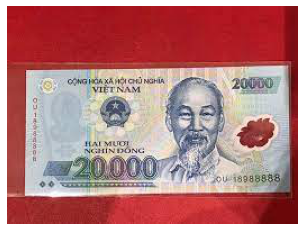

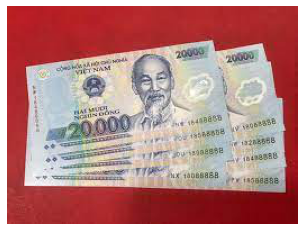

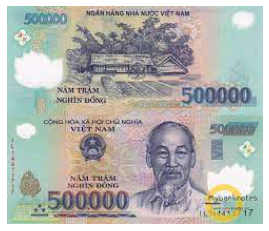

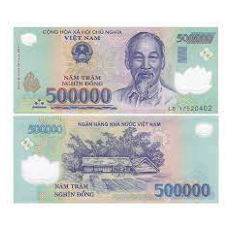

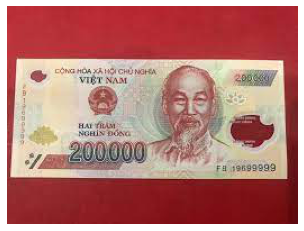

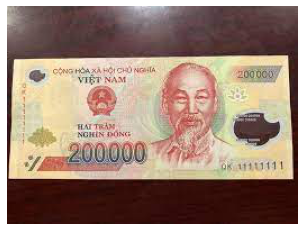

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_dau = [os.path.join(k20_dir, fname) 
                for fname in k20_files[pic_index-2:pic_index]]
next_xoai = [os.path.join(k500_dir, fname) 
                for fname in k500_files[pic_index-2:pic_index]]
next_bo = [os.path.join(k200_dir, fname) 
                for fname in k200_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_dau+next_xoai+next_bo):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(499, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 49, 49, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 23, 23, 64)       

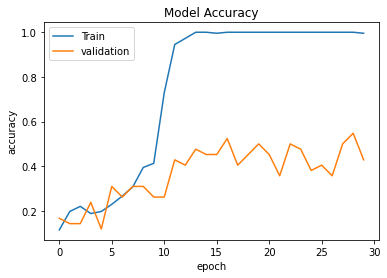

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/AI/phanloaitien.h5')

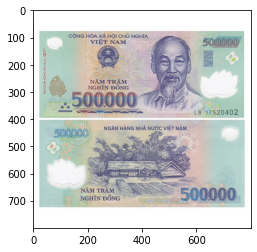

500k


In [ ]:
filename = '/content/drive/MyDrive/AI/TestTien/500k.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('100k')
elif kq ==1:
  print('10k')
elif kq ==2:
  print('1k')
elif kq ==3:
  print('200k')
elif kq ==4:
  print('200d')
elif kq ==5:
  print('20k')
elif kq ==6:
  print('2k')
elif kq ==7:
  print('5k')
elif kq ==8:
  print('500d')
elif kq ==9:
  print('50k')
elif kq ==10:
  print('500k')

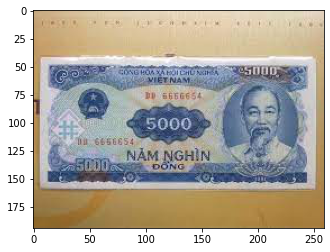

5k


In [ ]:
filename = '/content/drive/MyDrive/AI/TestTien/5k.jpg'  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (100,100))
img = img_to_array(img)
img =  img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
kq = np.argmax(model.predict(img),axis= -1)
if kq==0:
  print('100k')
elif kq ==1:
  print('10k')
elif kq ==2:
  print('1k')
elif kq ==3:
  print('200k')
elif kq ==4:
  print('200d')
elif kq ==5:
  print('20k')
elif kq ==6:
  print('2k')
elif kq ==7:
  print('500k')
elif kq ==8:
  print('500d')
elif kq ==9:
  print('50k')
elif kq ==10:
  print('5k')